In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split

In [118]:
NAME = 'CatsDogs-CNN{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [12]:
X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = X/255.0


In [13]:
#CNN model
model = Sequential()

In [14]:
model.add(Conv2D(32,(3,3), padding='same',
                 activation='relu', input_shape = X.shape[1:]))
model.add(Conv2D(32,(3,3), padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same',
                activation='relu'))
model.add(Conv2D(64,(3,3), padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [16]:

model.compile(optimizer='SGD', loss='binary_crossentropy',
             metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [17]:
epochs = 20
batch_size = 64

In [18]:
#data augmentation
datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2)
datagen.fit(X)

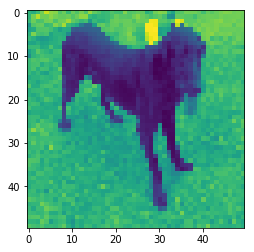

In [19]:
#split training and validation set for the fitting
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size=0.1,
                                                 random_state=random_seed)
g = plt.imshow(X_train[1099][:,:,0])

In [ ]:

history = model.fit_generator(datagen.flow(X, y, batch_size = batch_size),
                   epochs = epochs, validation_data = (X_val, y_val),
                   verbose = 2, 
                   steps_per_epoch = X.shape[0] // batch_size,
                   callbacks=[learning_rate_reduction])

Epoch 1/20
